In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28,1),    # Shape No incluye el tamaño del lote
                          batch_size=None,
                          dtype=tf.float32,
                          sparse=False,       # Si Admite Tensores Dispersos
                          batch_shape=None,   # (batch_size,shape)
                          name="Input Layer",
                          tensor=None,        # Tensor Batch por Defecto a usar cuando la entrada sea None (en model.train_on_batch())
                          optional=False      # Si Admite Valores None (Notar que Conv2D y etc igual no podran procesar esos valores, su uso es para capas creadas por el usuario que puedan procesar None)
                          ),
    tf.keras.layers.Flatten(data_format="channels_last"),
    tf.keras.layers.Dense(units=32,
                          activation=tf.keras.activations.relu,
                          use_bias=True,
                          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42), # La seed es como el time en random(time) determina estado aleatorio
                          bias_initializer= tf.keras.initializers.Zeros(),
                          kernel_regularizer= tf.keras.regularizers.L1(0.01),
                          bias_regularizer= tf.keras.regularizers.L1(0.01),
                          activity_regularizer=None,
                          kernel_constraint=tf.keras.constraints.MinMaxNorm(min_value=0.0, max_value=1.0, rate=1.0, axis=0), # La norma del vector inputs
                          bias_constraint=tf.keras.constraints.NonNeg(),
                          name="Dense"    # Parte de **kwargs, (Argumentos extra en forma de diccionario)
                          ),
    tf.keras.layers.Dense(10,
                          activation=tf.keras.activations.softmax,
                          use_bias=True,
                          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42), # La seed es como el time en random(time) determina estado aleatorio
                          bias_initializer= tf.keras.initializers.Zeros(),
                          kernel_regularizer= tf.keras.regularizers.L1(0.01),
                          bias_regularizer= tf.keras.regularizers.L1(0.01),
                          activity_regularizer=None,
                          kernel_constraint=None,
                          bias_constraint=None,
                          name="Softmax"    # Parte de **kwargs, (Argumentos extra en forma de diccionario)
                          )
])


In [4]:
# Print the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense (Dense)                        │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Softmax (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [6]:
# Build the Sequential convolutional neural network model
modelConv = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28,1),batch_size=None,name="Input"),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(3,3),
                           strides=(1,1),
                           padding="same",
                           data_format="channels_last",
                           dilation_rate=(1,1),
                           groups=1,
                           activation=tf.keras.activations.relu,
                           use_bias=True,
                           kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42),
                           bias_initializer=tf.keras.initializers.Zeros(),
                           kernel_regularizer=tf.keras.regularizers.L1L2(0.01,0.01),
                           bias_regularizer=tf.keras.regularizers.L1L2(0.01,0.01),
                           activity_regularizer=None,
                           kernel_constraint=None,
                           bias_constraint=None,
                           name="Conv-1"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),
                              strides=(2,2),
                              padding='valid',
                              data_format="channels_last",
                              name="MaxPool-1"),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(3,3),
                           strides=(1,1),
                           padding="same",
                           data_format="channels_last",
                           dilation_rate=(1,1),
                           groups=1,
                           activation=tf.keras.activations.relu,
                           use_bias=True,
                           kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42),
                           bias_initializer=tf.keras.initializers.Zeros(),
                           kernel_regularizer=tf.keras.regularizers.L1L2(0.01,0.01),
                           bias_regularizer=tf.keras.regularizers.L1L2(0.01,0.01),
                           activity_regularizer=None,
                           kernel_constraint=None,
                           bias_constraint=None,
                           name="Conv-2"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),
                              strides=(2,2),
                              padding='valid',
                              data_format="channels_last",
                              name="MaxPool-2"),
    tf.keras.layers.Flatten(data_format="channels_last",name="Flatten"),
    tf.keras.layers.Dense(units=64,
                          activation=tf.keras.activations.relu,
                          use_bias=True,
                          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42), # La seed es como el time en random(time) determina estado aleatorio
                          bias_initializer= tf.keras.initializers.Zeros(),
                          kernel_regularizer= tf.keras.regularizers.L1(0.01),
                          bias_regularizer= tf.keras.regularizers.L1(0.01),
                          activity_regularizer=None,
                          kernel_constraint=None,
                          bias_constraint=None,
                          name="Dense"
                          ),
    tf.keras.layers.Dense(units=10,
                          activation=tf.keras.activations.softmax,
                          use_bias=True,
                          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42), # La seed es como el time en random(time) determina estado aleatorio
                          bias_initializer= tf.keras.initializers.Zeros(),
                          kernel_regularizer= tf.keras.regularizers.L1(0.01),
                          bias_regularizer= tf.keras.regularizers.L1(0.01),
                          activity_regularizer=None,
                          kernel_constraint=None,
                          bias_constraint=None,
                          name="Softmax"
                          )
])


In [7]:
# Print the model summary
modelConv.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv-1 (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool-1 (MaxPooling2D)             │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv-2 (Conv2D)                      │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool-2 (MaxPooling2D)             │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense (Dense)                        │ (None, 64)                  │         100,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Softmax (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,634 (432.16 KB)

 Trainable params: 110,634 (432.16 KB)

 Non-trainable params: 0 (0.00 B)

***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [8]:
# Define the model optimizer, loss function and metrics
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy])
modelConv.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=[tf.keras.metrics.SparseCategoricalAccuracy])


In [9]:
# Print the resulting model attributes
print("MODEL FEEDFORDWARD")
print(model.optimizer)
print(model.loss)
print(model.metrics)
print("MODEL CONV")
print(modelConv.optimizer)
print(modelConv.loss)
print(modelConv.metrics)


MODEL FEEDFORDWARD
[<Mean name=loss>, <CompileMetrics name=compile_metrics>]
MODEL CONV
[<Mean name=loss>, <CompileMetrics name=compile_metrics>]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [11]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
# Print the shape of the training data
train_images = tf.reshape(tensor=tf.constant(train_images),shape=(60000, 28, 28, 1))
test_images = tf.reshape(tensor=tf.constant(test_images),shape=(10000, 28, 28, 1))
train_labels = tf.reshape(tensor=tf.constant(train_labels),shape=(60000, 1))
test_labels = tf.reshape(tensor=tf.constant(test_labels),shape=(10000, 1))
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)


(60000, 28, 28, 1)
(60000, 1)
(10000, 28, 28, 1)
(10000, 1)


In [13]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [14]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = (train_images - tf.reduce_min(train_images)) / (tf.reduce_max(train_images) - tf.reduce_min(train_images))
test_images = (test_images - tf.reduce_min(test_images)) / (tf.reduce_max(test_images) - tf.reduce_min(test_images))


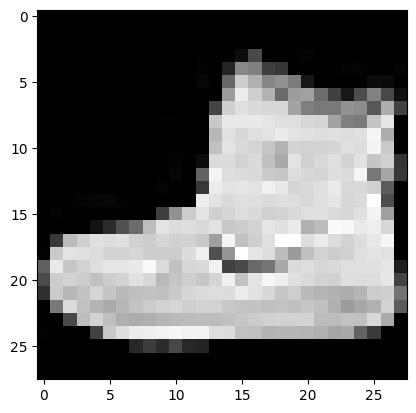

In [15]:
# Display one of the images
plt.imshow(train_images[0],cmap="gray")
plt.show()


#### Fit the model

In [16]:
# Fit the model
history = model.fit(train_images,train_labels,batch_size=32,epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0000e+00 - loss: 2.7774 - sparse_categorical_accuracy: 0.6172
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0000e+00 - loss: 1.6303 - sparse_categorical_accuracy: 0.6823
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0000e+00 - loss: 1.5363 - sparse_categorical_accuracy: 0.6959
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0000e+00 - loss: 1.5190 - sparse_categorical_accuracy: 0.7038
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0000e+00 - loss: 1.4938 - sparse_categorical_accuracy: 0.7144
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0000e+00 - loss: 1.4699 - sparse_categorical_accuracy: 0.7123
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0000e+00 - loss: 1.4667 - sparse_categorical_accuracy: 0.7181
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0000e+00 - loss: 1.462

In [17]:
# Fit Model Conv
historyConv = modelConv.fit(train_images,train_labels,batch_size=32,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 32ms/step - accuracy: 0.0000e+00 - loss: 4.9191 - sparse_categorical_accuracy: 0.1062
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.0000e+00 - loss: 2.4353 - sparse_categorical_accuracy: 0.0989
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 30ms/step - accuracy: 0.0000e+00 - loss: 2.4355 - sparse_categorical_accuracy: 0.1033
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 100s 40ms/step - accuracy: 0.0000e+00 - loss: 2.4355 - sparse_categorical_accuracy: 0.1005
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - accuracy: 0.0000e+00 - loss: 2.4355 - sparse_categorical_accuracy: 0.0989
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 36ms/step - accuracy: 0.0000e+00 - loss: 2.4355 - sparse_categorical_accuracy: 0.0982
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 103s 47ms/step - accuracy: 0.0000e+00 - loss: 2.4355 - sparse_categorical_accuracy: 0.0996
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 112s 31ms/step - accuracy: 0.000

#### Plot training history

In [18]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head()


,accuracy,loss,sparse_categorical_accuracy
0,0.0,2.034650,0.653550
1,0.0,1.606868,0.684517
2,0.0,1.533170,0.698567
3,0.0,1.513138,0.707417
4,0.0,1.491094,0.713650


In [32]:
df.sparse_categorical_accuracy

,sparse_categorical_accuracy
0,0.653550
1,0.684517
2,0.698567
3,0.707417
4,0.713650
5,0.716250
6,0.719800
7,0.720950
8,0.719667
9,0.722250


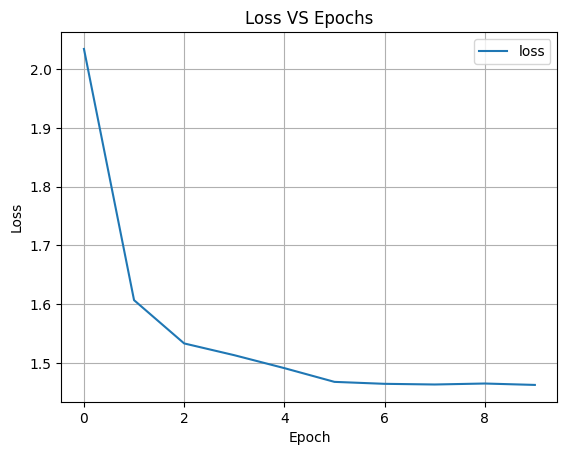

In [45]:
# Make a plot for the loss
df.plot(x=None, y="loss", kind="line")    # Crea una figura que es ahora la figura actual
plt.title("Loss VS Epochs")               # Todos los plt se ejecutan sobre la figura actual
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)
plt.show()


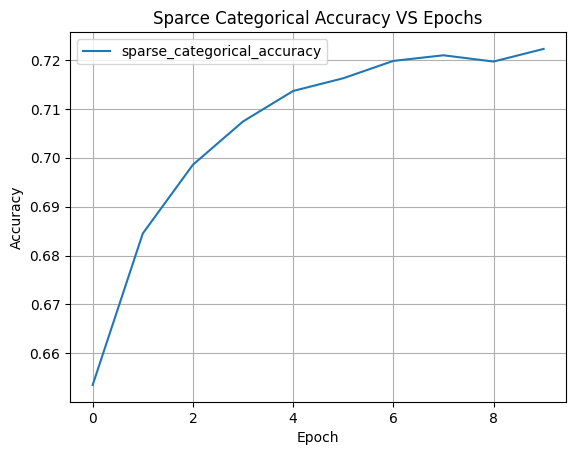

In [40]:
# Make a plot for the accuracy
df.plot(x=None, y="sparse_categorical_accuracy", kind="line")   # Crea una figura que es ahora la figura actual
plt.title("Sparce Categorical Accuracy VS Epochs")              # Todos los plt se ejecutan sobre la figura actual
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.grid(True)
plt.show()


In [44]:
# Make a plot for the additional metric
print(plt.get_fignums())


[]


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [46]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [50]:
# Evaluate the model
eval = model.evaluate(x=test_images,y=test_labels,batch_size=32,return_dict=True)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 1.4804 - sparse_categorical_accuracy: 0.7160


#### Make predictions from the model

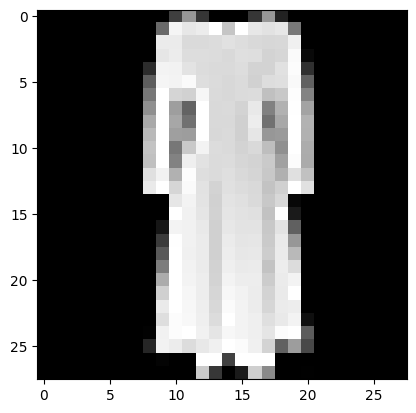

Label: Dress


In [55]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image, cmap="gray")
plt.show()
print(f"Label: {labels[int(test_labels[random_inx])]}")

In [76]:
# Get the model predictions
output = tf.constant(model.predict(x=test_images[random_inx:(random_inx+1)]))
labels[tf.argmax(output,1).numpy()[0]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


'Dress'